In [303]:
import numpy as np 
import matplotlib.pyplot as plt

In [350]:
class Genetic: 
    
    def __init__(self, chromosomes, function, pcross=0.5, pmut = 0.1, ):
        
        self.chromosomes = chromosomes
        self.pcross = pcross 
        self.pmut = pmut
        self.pupulation_number = chromosomes.shape[0]
        self.chromosome_size = chromosomes.shape[1]
        self.function = function
        
    def mutate(self, seed = 123): 
        
        chromosomes = np.random.permutation(self.chromosomes)
        number_to_mutate = int(np.floor(self.pmut * len(chromosomes)))
        if number_to_mutate == 0 : 
            return 
        chromosomes_to_mutate = chromosomes[0 : number_to_mutate]
        for i in range(len(chromosomes_to_mutate)):
            chromosomes_to_mutate[i,np.random.randint(0, self.chromosome_size)] += np.random.normal()
            
        chromosomes[0 : number_to_mutate] = chromosomes_to_mutate
        
        self.chromosomes = np.random.permutation(chromosomes)
    
    @staticmethod
    def cross(a,b):
        assert len(a) == len(b)
        
        n = len(a)
        split_point = np.random.randint(1,n-1)
        first_child  = np.append(a[:split_point], b[split_point:])
        second_child = np.append(b[:split_point], a[split_point:])
        
        return first_child, second_child
        
    def pick_best(self, chromosomes):
        values = np.apply_along_axis(self.function, 1, chromosomes)
        probs = np.array([val/sum(values) for val in values])
        self.best.append(chromosomes[np.argmax(probs)])
        self.mean.append(np.mean(1/values))
        choice = np.random.choice(np.arange(len(chromosomes)), size = len(chromosomes), replace = True, p = probs).astype('int')
        parents = chromosomes[choice]
        
        return parents
        
    def evolution(self, iterations = 100):
        self.best = []
        self.mean = [] 
                         
        for i in range(iterations):
            chromosomes = np.random.permutation(self.chromosomes)
            parents = self.pick_best(self.chromosomes)
            
            children = []
            while len(children) < len(chromosomes): 
                if self.pcross >= np.random.uniform(0,1): 
                    child1, child2 = self.cross(parents[np.random.randint(len(parents))], parents[np.random.randint(len(parents))])
                    children.append(child1)
                    children.append(child2)
                else: 
                    children.append(parents[np.random.randint(len(parents))])
                
            
            self.chromosomes = np.array(children[:len(chromosomes)])
            self.mutate(self.chromosomes)
        nothing = self.pick_best(self.chromosomes)
        print('---- evolution ended ----')
        print(f'best result {list(self.best[-1])}')
        
        

# x^2+y^2+2z^2 

In [355]:
def func(a):
    x = a[0]
    y = a[1]
    z = a[2]
    return 1/(x**2 + y**2 + 2*z**2)

In [356]:
chromosomes = np.random.uniform(-20, 20, size=(100,3))

In [357]:
gen = Genetic(chromosomes, func, 13)

In [358]:
gen.evolution(30) # 30 iteracji 

---- evolution ended ----
best result [0.13384887585727068, 0.006747910146994135, 0.03660510119130464]


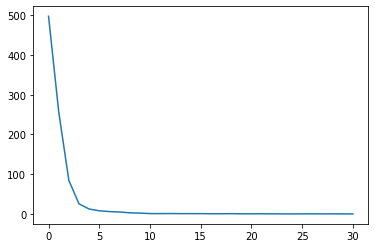

In [359]:
plt.plot(gen.mean) # wartość funkcji dla chromosomów w poszczególnych iteracjach

Najlepsza wartość chromosomu to: 

In [360]:
gen.best[-1]

array([0.13384888, 0.00674791, 0.0366051 ])

Co jest bardzo bliskie 0, gdzie faktycznie jest minimum. Co by się jednak stało, gdyby zaczynać w kompletnie innym miejscu? 

---- evolution ended ----
best result [6.48230159669954e-05, 0.0006939487405129593, 0.000552514014062921]


array([6.48230160e-05, 6.93948741e-04, 5.52514014e-04])

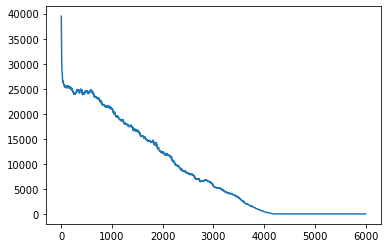

In [362]:
chromosomes = np.random.uniform(-120, -80, size=(100,3))
gen = Genetic(chromosomes, func, pcross=0.5, pmut = 0.1, )
gen.evolution(6000) 
plt.plot(gen.mean)
gen.best[-1]

Jak widać algorytm wyrzucony nawet bardzo daleko od zera bez problemu znalazł minimum.

# Rastrigin

In [373]:
def rastrigin(a):
    return 1/(50 + sum(a**2 - 10*np.cos(2*np.pi*a)))

In [374]:
chromosomes = np.random.uniform(-20, 20, size=(100,5))

In [375]:
gen = Genetic(chromosomes, rastrigin)

In [376]:
gen.evolution(100)

---- evolution ended ----
best result [-0.0015145693198789015, 0.0025663930254973266, 0.034271729309591215, 0.03150122909779578, 0.010918160475029609]


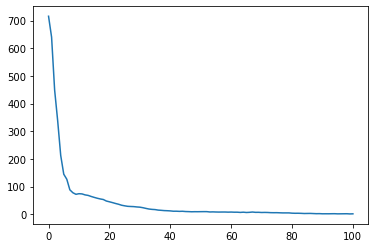

In [377]:
plt.plot(gen.mean)

Znów algorytm osiągnął osiągnęła zamierzony cel. Tak jak wcześniej sprawdźmy jak radzi sobie gdy jego chromosomy nie będą rozrzucone blisko minimum.

---- evolution ended ----
best result [-3.6347515339348936e-05, 0.00040002394359179324, -0.00054642566926342, 0.0004824039283087213, -0.0008026177841176925]


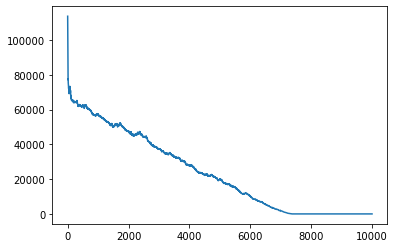

In [384]:
chromosomes = np.random.uniform(100, 200, size=(100,5))
gen = Genetic(chromosomes, rastrigin, pcross = 0.6, pmut=0.3)
gen.evolution(10000)
plt.plot(gen.mean)

Tak jak wcześniej osiągnęliśmy satysfakcjonujący poziom minimum. 

# Wnioski
Algorytm genetyczny w powyższych zadaniach radzi sobie bardzo dobrze. Ciekawą modyfikacją mogłaby być wielkosć mutacji zależna od iteracji algorytmu, aby początkowo mutacje były duże, a na końcu najmniejsze. Zobaczmy jak to poprawi nasz algorytm.

In [427]:
class Genetic: 
    
    def __init__(self, chromosomes, function, pcross=0.5, pmut = 0.1, ):
        
        self.chromosomes = chromosomes
        self.pcross = pcross 
        self.pmut = pmut
        self.pupulation_number = chromosomes.shape[0]
        self.chromosome_size = chromosomes.shape[1]
        self.function = function
        
    def mutate(self, iteration = 500, seed = 123): 
        chromosomes = np.random.permutation(self.chromosomes)
        number_to_mutate = int(np.floor(self.pmut * len(chromosomes)))
        if number_to_mutate == 0 : 
            return 
        chromosomes_to_mutate = chromosomes[0 : number_to_mutate]
        for i in range(len(chromosomes_to_mutate)):
            
            chromosomes_to_mutate[i,np.random.randint(0, self.chromosome_size)] += np.random.normal(0,scale = 500/iteration)
            
        chromosomes[0 : number_to_mutate] = chromosomes_to_mutate
        
        self.chromosomes = np.random.permutation(chromosomes)
    
    @staticmethod
    def cross(a,b):
        assert len(a) == len(b)
        
        n = len(a)
        split_point = np.random.randint(1,n-1)
        first_child  = np.append(a[:split_point], b[split_point:])
        second_child = np.append(b[:split_point], a[split_point:])
        
        return first_child, second_child
        
    def pick_best(self, chromosomes):
        values = np.apply_along_axis(self.function, 1, chromosomes)
        probs = np.array([val/sum(values) for val in values])
        self.best.append(chromosomes[np.argmax(probs)])
        self.mean.append(np.mean(1/values))
        choice = np.random.choice(np.arange(len(chromosomes)), size = len(chromosomes), replace = True, p = probs).astype('int')
        parents = chromosomes[choice]
        
        return parents
        
    def evolution(self, iterations = 100):
        self.best = []
        self.mean = [] 
                         
        for i in range(iterations):
            chromosomes = np.random.permutation(self.chromosomes)
            parents = self.pick_best(self.chromosomes)
            
            children = []
            while len(children) < len(chromosomes): 
                if self.pcross >= np.random.uniform(0,1): 
                    child1, child2 = self.cross(parents[np.random.randint(len(parents))], parents[np.random.randint(len(parents))])
                    children.append(child1)
                    children.append(child2)
                else: 
                    children.append(parents[np.random.randint(len(parents))])
                
            self.chromosomes = np.array(children[:len(chromosomes)])
            self.mutate(iteration = i+1)
        nothing = self.pick_best(self.chromosomes)
        print('---- evolution ended ----')
        print(f'best result {list(self.best[-1])}')
        
        

---- evolution ended ----
best result [-0.05557470445227253, 1.9668235220222503, -0.07633667743878769, -0.011954122343764223, 0.07434056979256565]


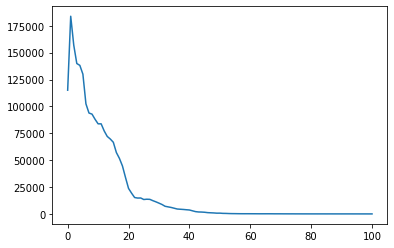

In [429]:
chromosomes = np.random.uniform(100, 200, size=(100,5))
gen = Genetic(chromosomes, rastrigin, pcross = 0.6, pmut=0.3)
gen.evolution(100)
plt.plot(gen.mean)

Ta zmiana poskutkowała. Algorytm zbiegł zdecydowanie szybciej (ponad 10-krotnie)! To usprawnienie może być kluczowe w przypadku cięższych problemów, gdy nie wiemy w jakich okolicach szukać minimum. 